In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt

In [117]:
sarima = pd.read_csv('sarima performance metrics.csv', index_col = 0)
sarima_df = sarima.copy()
sarima_df['type'] = 'sarima'

sarimax = pd.read_csv('sarimax performance metrics.csv', index_col = 0)
sarimax_df = sarimax.copy()
sarimax_df['type'] = 'sarimax'

holt = pd.read_csv('holt performance metrics.csv', index_col = 0)
holt_df = holt.copy()
holt_df['type'] = 'holt'

measures = pd.concat([sarima_df, sarimax_df, holt_df], ignore_index=True)

# mean and median of the different performance measures per type

There is a very small difference between the Sarima and the SarimaX models.

In [118]:
measures.groupby('type').mean()

,r2,MAE,MedAE,MSE,RMSE,MAPE,MDAPE
type,,,,,,,
holt,-7.456266e+02,1.223715e+05,1.250526e+05,1.449505e+11,1.509222e+05,4.696291e+02,3.936821e+02
sarima,-1.497052e+25,3.910202e+15,1.583824e+15,1.007878e+34,7.127795e+15,1.245914e+12,2.283931e+11
sarimax,-1.496931e+25,3.877480e+15,1.583824e+15,1.007496e+34,7.020724e+15,1.239137e+12,2.283931e+11


In [119]:
measures.groupby('type').median()

,r2,MAE,MedAE,MSE,RMSE,MAPE,MDAPE
type,,,,,,,
holt,-0.988285,70594.234705,62030.838571,7.484838e+09,86514.959145,13.330065,10.891756
sarima,-0.766548,77407.674364,69708.644297,8.557739e+09,92508.048593,14.740205,12.172672
sarimax,-0.766548,77407.674364,69708.644357,8.557739e+09,92508.048587,14.740205,12.172672


# plots


In [120]:
plt.rcParams['figure.figsize'] = [5, 5.5]

cols_1 = ['MAE', 'MedAE', 'RMSE']
cols_2 = ['MSE']
cols_3 = ['r2', 'MAPE', 'MDAPE']

sarima_plot_1 = sarima[cols_1].melt()
sarima_plot_1['type'] = 'sarima'

sarimax_plot_1 = sarimax[cols_1].melt()
sarimax_plot_1['type'] = 'sarimax'

holt_plot_1 = holt[cols_1].melt()
holt_plot_1['type'] = 'holt'

measures_1 = pd.concat([sarima_plot_1, sarimax_plot_1, holt_plot_1], ignore_index=True)

sarima_plot_2 = sarima[cols_2].melt()
sarima_plot_2['type'] = 'sarima'

sarimax_plot_2 = sarimax[cols_2].melt()
sarimax_plot_2['type'] = 'sarimax'

holt_plot_2 = holt[cols_2].melt()
holt_plot_2['type'] = 'holt'

measures_2 = pd.concat([sarima_plot_2, sarimax_plot_2, holt_plot_2], ignore_index=True)

sarima_plot_3 = sarima[cols_3].melt()
sarima_plot_3['type'] = 'sarima'

sarimax_plot_3 = sarimax[cols_3].melt()
sarimax_plot_3['type'] = 'sarimax'

holt_plot_3 = holt[cols_3].melt()
holt_plot_3['type'] = 'holt'

measures_3 = pd.concat([sarima_plot_3, sarimax_plot_3, holt_plot_3], ignore_index=True)

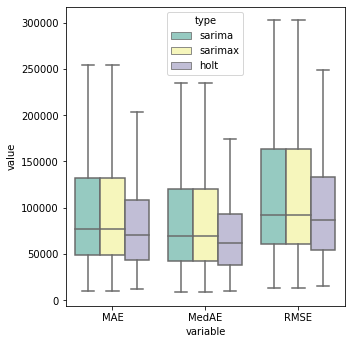

In [121]:
sns.boxplot(x="variable", y="value", hue="type", data=measures_1, palette="Set3", showfliers = False)

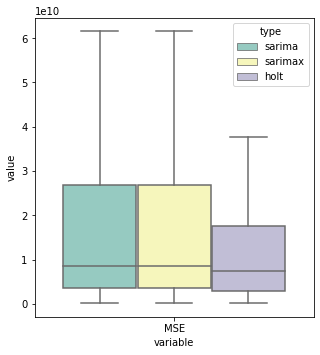

In [122]:
sns.boxplot(x="variable", y="value", hue="type", data=measures_2, palette="Set3", showfliers = False)

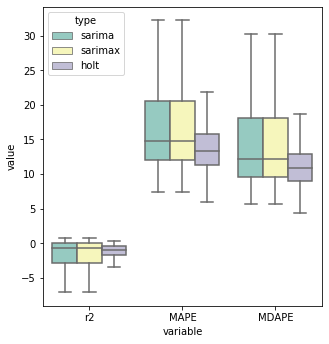

In [123]:
sns.boxplot(x="variable", y="value", hue="type", data=measures_3, palette="Set3", showfliers = False)

# comparing the different scores

For each row (with indicate areas), the best model is determined per score. <br>
These scores are tallied, to determine per score which model performs best for the most areas. <br>
This way the different scales of the different areas are taken into account <br>

By this measure, the interference of outliers can be minimized, and the scales should not be as influential

- $R^2$ should be as high as possible

The other values should be as low as possible
- MAE (Mean absolute error) 
- MedAE (Median absolute error) 
- MSE (Mean squared error) 
- RMSE (Root mean squared error) 
- MAPE (Mean absolute percentage error) 
- MDAPE (Median absolute percentage error) 

In [124]:
tallies = pd.DataFrame({'r2': [0,0,0], 'MAE':[0,0,0], 'MedAE':[0,0,0], 'MSE':[0,0,0],
             'RMSE':[0,0,0], 'MAPE':[0,0,0], 'MDAPE':[0,0,0]}, index = ['sarima', 'sarimax', 'holt winters'])

models = tallies.index
# evaluate per row which model performs best
for i in sarima.index:
    
    # iterate through all rows
    for measure in sarima.columns:
        scores = [sarima.loc[i, measure], sarimax.loc[i, measure], holt.loc[i, measure]]
        best_model = models[ scores.index(max(scores)) ] if measure == 'r2' else models[ scores.index(min(scores)) ]
        
        tallies.loc[best_model , measure] += 1

In [125]:
tallies

,r2,MAE,MedAE,MSE,RMSE,MAPE,MDAPE
sarima,98,65,57,62,62,52,57
sarimax,89,52,60,47,47,53,60
holt winters,146,216,216,224,224,228,216
